In [1]:
# 텐서플로우의 기본적인 구성을 익힙니다.
import tensorflow as tf

# tf.constant: 말 그대로 상수입니다.
hello = tf.constant('Hello, TensorFlow!')
print(hello)

a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a, b)  # a + b 로도 쓸 수 있음
print(c)

# 위에서 변수와 수식들을 정의했지만, 실행이 정의한 시점에서 실행되는 것은 아닙니다.
# 다음처럼 Session 객제와 run 메소드를 사용할 때 계산이 됩니다.
# 따라서 모델을 구성하는 것과, 실행하는 것을 분리하여 프로그램을 깔끔하게 작성할 수 있습니다.
# 그래프를 실행할 세션을 구성합니다.
sess = tf.Session()
# sess.run: 설정한 텐서 그래프(변수나 수식 등등)를 실행합니다.
print(sess.run(hello))
print(sess.run([a, b, c]))

# 세션을 닫습니다.
sess.close()

Tensor("Const:0", shape=(), dtype=string)
Tensor("Add:0", shape=(), dtype=int32)
b'Hello, TensorFlow!'
[10, 32, 42]


In [2]:
# 플레이스홀더와 변수의 개념을 익혀봅니다
import tensorflow as tf

# tf.placeholder: 계산을 실행할 때 입력값을 받는 변수로 사용합니다.
# None 은 크기가 정해지지 않았음을 의미합니다.
X = tf.placeholder(tf.float32, [None, 3])
print(X)

# X 플레이스홀더에 넣을 값 입니다.
# 플레이스홀더에서 설정한 것 처럼, 두번째 차원의 요소의 갯수는 3개 입니다.
x_data = [[1, 2, 3], [4, 5, 6]]

# tf.Variable: 그래프를 계산하면서 최적화 할 변수들입니다. 이 값이 바로 신경망을 좌우하는 값들입니다.
# tf.random_normal: 각 변수들의 초기값을 정규분포 랜덤 값으로 초기화합니다.
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([2, 1]))

# 입력값과 변수들을 계산할 수식을 작성합니다.
# tf.matmul 처럼 mat* 로 되어 있는 함수로 행렬 계산을 수행합니다.
expr = tf.matmul(X, W) + b

sess = tf.Session()
# 위에서 설정한 Variable 들의 값들을 초기화 하기 위해
# 처음에 tf.global_variables_initializer 를 한 번 실행해야 합니다.
sess.run(tf.global_variables_initializer())

print("=== x_data ===")
print(x_data)
print("=== W ===")
print(sess.run(W))
print("=== b ===")
print(sess.run(b))
print("=== expr ===")
# expr 수식에는 X 라는 입력값이 필요합니다.
# 따라서 expr 실행시에는 이 변수에 대한 실제 입력값을 다음처럼 넣어줘야합니다.
print(sess.run(expr, feed_dict={X: x_data}))

sess.close()

Tensor("Placeholder:0", shape=(?, 3), dtype=float32)
=== x_data ===
[[1, 2, 3], [4, 5, 6]]
=== W ===
[[-1.01187325  0.71489936]
 [ 0.34744123  1.69286299]
 [ 1.23298061 -0.53459537]]
=== b ===
[[-0.1315411 ]
 [-1.08615482]]
=== expr ===
[[ 3.25040984  2.36529851]
 [ 4.00144148  7.0301857 ]]


In [3]:
# X 와 Y 의 상관관계를 분석하는 기초적인 선형 회귀 모델을 만들고 실행해봅니다.
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

# name: 나중에 텐서보드등으로 값의 변화를 추적하거나 살펴보기 쉽게 하기 위해 이름을 붙여줍니다.
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")
print(X)
print(Y)

# X 와 Y 의 상관 관계를 분석하기 위한 가설 수식을 작성합니다.
# y = W * x + b
# W 와 X 가 행렬이 아니므로 tf.matmul 이 아니라 기본 곱셈 기호를 사용했습니다.
hypothesis = W * X + b

# 손실 함수를 작성합니다.
# mean(h - Y)^2 : 예측값과 실제값의 거리를 비용(손실) 함수로 정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 경사 하강법 최적화를 수행합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
# 비용을 최소화 하는 것이 최종 목표
train_op = optimizer.minimize(cost)

# 세션을 생성하고 초기화합니다.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # 최적화를 100번 수행합니다.
    for step in range(100):
        # sess.run 을 통해 train_op 와 cost 그래프를 계산합니다.
        # 이 때, 가설 수식에 넣어야 할 실제값을 feed_dict 을 통해 전달합니다.
        _, cost_val = sess.run([train_op, cost], feed_dict={X: x_data, Y: y_data})

        print(step, cost_val, sess.run(W), sess.run(b))

    # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인해봅니다.
    print("\n=== Test ===")
    print("X: 5, Y:", sess.run(hypothesis, feed_dict={X: 5}))
    print("X: 2.5, Y:", sess.run(hypothesis, feed_dict={X: 2.5}))

Tensor("X:0", dtype=float32)
Tensor("Y:0", dtype=float32)
0 3.95209 [ 0.92650479] [ 0.39562827]
1 0.0654218 [ 0.83684903] [ 0.34590071]
2 0.0181296 [ 0.85076296] [ 0.34198096]
3 0.0167406 [ 0.85325849] [ 0.33327958]
4 0.0159392 [ 0.8569054] [ 0.32532027]
5 0.015182 [ 0.86033225] [ 0.31749406]
6 0.0144608 [ 0.86369115] [ 0.30986235]
7 0.0137739 [ 0.8669678] [ 0.3024134]
8 0.0131196 [ 0.87016577] [ 0.2951436]
9 0.0124965 [ 0.87328696] [ 0.28804857]
10 0.0119028 [ 0.87633306] [ 0.28112409]
11 0.0113374 [ 0.8793059] [ 0.27436605]
12 0.0107989 [ 0.88220727] [ 0.26777047]
13 0.010286 [ 0.88503897] [ 0.26133347]
14 0.00979736 [ 0.88780254] [ 0.25505117]
15 0.00933199 [ 0.89049971] [ 0.24891992]
16 0.00888871 [ 0.89313197] [ 0.24293603]
17 0.00846648 [ 0.89570099] [ 0.23709603]
18 0.00806432 [ 0.89820832] [ 0.23139642]
19 0.00768126 [ 0.90065533] [ 0.22583382]
20 0.00731639 [ 0.90304345] [ 0.22040492]
21 0.00696887 [ 0.90537429] [ 0.21510656]
22 0.00663784 [ 0.90764904] [ 0.20993555]
23 0.0063

In [4]:
# 털과 날개가 있는지 없는지에 따라, 포유류인지 조류인지 분류하는 신경망 모델을 만들어봅니다.
import tensorflow as tf
import numpy as np

# [털, 날개]
x_data = np.array(
    [[0, 0], [1, 0], [1, 1], [0, 0], [0, 0], [0, 1]])

# [기타, 포유류, 조류]
# 다음과 같은 형식을 one-hot 형식의 데이터라고 합니다.
y_data = np.array([
    [1, 0, 0],  # 기타
    [0, 1, 0],  # 포유류
    [0, 0, 1],  # 조류
    [1, 0, 0],
    [1, 0, 0],
    [0, 0, 1]
])

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# 신경망은 2차원으로 [입력층(특성), 출력층(레이블)] -> [2, 3] 으로 정합니다.
W = tf.Variable(tf.random_uniform([2, 3], -1., 1.))

# 편향을 각각 각 레이어의 아웃풋 갯수로 설정합니다.
# 편향은 아웃풋의 갯수, 즉 최종 결과값의 분류 갯수인 3으로 설정합니다.
b = tf.Variable(tf.zeros([3]))

# 신경망에 가중치 W과 편향 b을 적용합니다
L = tf.add(tf.matmul(X, W), b)
# 가중치와 편향을 이용해 계산한 결과 값에
# 텐서플로우에서 기본적으로 제공하는 활성화 함수인 ReLU 함수를 적용합니다.
L = tf.nn.relu(L)

# 마지막으로 softmax 함수를 이용하여 출력값을 사용하기 쉽게 만듭니다
# softmax 함수는 다음처럼 결과값을 전체합이 1인 확률로 만들어주는 함수입니다.
# 예) [8.04, 2.76, -6.52] -> [0.53 0.24 0.23]
model = tf.nn.softmax(L)

# 신경망을 최적화하기 위한 비용 함수를 작성합니다.
# 각 개별 결과에 대한 합을 구한 뒤 평균을 내는 방식을 사용합니다.
# 전체 합이 아닌, 개별 결과를 구한 뒤 평균을 내는 방식을 사용하기 위해 axis 옵션을 사용합니다.
# axis 옵션이 없으면 -1.09 처럼 총합인 스칼라값으로 출력됩니다.
#        Y         model         Y * tf.log(model)   reduce_sum(axis=1)
# 예) [[1 0 0]  [[0.1 0.7 0.2]  -> [[-1.0  0    0]  -> [-1.0, -0.09]
#     [0 1 0]]  [0.2 0.8 0.0]]     [ 0   -0.09 0]]
# 즉, 이것은 예측값과 실제값 사이의 확률 분포의 차이를 비용으로 계산한 것이며,
# 이것을 Cross-Entropy 라고 합니다.
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(model), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)


#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(100):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})

    if (step + 1) % 10 == 0:
        print(step + 1, sess.run(cost, feed_dict={X: x_data, Y: y_data}))


#########
# 결과 확인
# 0: 기타 1: 포유류, 2: 조류
######
# tf.argmax: 예측값과 실제값의 행렬에서 tf.argmax 를 이용해 가장 큰 값을 가져옵니다.
# 예) [[0 1 0] [1 0 0]] -> [1 0]
#    [[0.2 0.7 0.1] [0.9 0.1 0.]] -> [1 0]
prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)
print('예측값:', sess.run(prediction, feed_dict={X: x_data}))
print('실제값:', sess.run(target, feed_dict={Y: y_data}))

is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))

10 1.1013
20 1.09925
30 1.0972
40 1.09527
50 1.09329
60 1.09138
70 1.0895
80 1.08765
90 1.0858
100 1.08405
예측값: [2 0 0 2 2 2]
실제값: [0 1 2 0 0 2]
정확도: 16.67


In [6]:
# 털과 날개가 있는지 없는지에 따라, 포유류인지 조류인지 분류하는 신경망 모델을 만들어봅니다.
# 신경망의 레이어를 여러개로 구성하여 말로만 듣던 딥러닝을 구성해 봅시다!
import tensorflow as tf
import numpy as np

# [털, 날개]
x_data = np.array(
    [[0, 0], [1, 0], [1, 1], [0, 0], [0, 0], [0, 1]])

# [기타, 포유류, 조류]
y_data = np.array([
    [1, 0, 0],  # 기타
    [0, 1, 0],  # 포유류
    [0, 0, 1],  # 조류
    [1, 0, 0],
    [1, 0, 0],
    [0, 0, 1]
])

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# 첫번째 가중치의 차원은 [특성, 히든 레이어의 뉴런갯수] -> [2, 10] 으로 정합니다.
W1 = tf.Variable(tf.random_uniform([2, 10], -1., 1.))
# 두번째 가중치의 차원을 [첫번째 히든 레이어의 뉴런 갯수, 분류 갯수] -> [10, 3] 으로 정합니다.
W2 = tf.Variable(tf.random_uniform([10, 3], -1., 1.))

# 편향을 각각 각 레이어의 아웃풋 갯수로 설정합니다.
# b1 은 히든 레이어의 뉴런 갯수로, b2 는 최종 결과값 즉, 분류 갯수인 3으로 설정합니다.
b1 = tf.Variable(tf.zeros([10]))
b2 = tf.Variable(tf.zeros([3]))

# 신경망의 히든 레이어에 가중치 W1과 편향 b1을 적용합니다
L1 = tf.add(tf.matmul(X, W1), b1)
L1 = tf.nn.relu(L1)

# 최종적인 아웃풋을 계산합니다.
# 히든레이어에 두번째 가중치 W2와 편향 b2를 적용하여 3개의 출력값을 만들어냅니다.
model = tf.add(tf.matmul(L1, W2), b2)

# 텐서플로우에서 기본적으로 제공되는 크로스 엔트로피 함수를 이용해
# 복잡한 수식을 사용하지 않고도 최적화를 위한 비용 함수를 다음처럼 간단하게 적용할 수 있습니다.
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=model))

optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)


#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(100):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})

    if (step + 1) % 10 == 0:
        print(step + 1, sess.run(cost, feed_dict={X: x_data, Y: y_data}))


#########
# 결과 확인
# 0: 기타 1: 포유류, 2: 조류
######
prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)
print('예측값:', sess.run(prediction, feed_dict={X: x_data}))
print('실제값:', sess.run(target, feed_dict={Y: y_data}))

is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))

10 0.739118
20 0.574231
30 0.428921
40 0.310023
50 0.217627
60 0.151172
70 0.105964
80 0.0760592
90 0.056298
100 0.0430156
예측값: [0 1 2 0 0 2]
실제값: [0 1 2 0 0 2]
정확도: 100.00


loss at step  10 :  5.53556
loss at step  20 :  4.13156
loss at step  30 :  3.79581
loss at step  40 :  3.55478
loss at step  50 :  3.43505
loss at step  60 :  3.2117
loss at step  70 :  3.15649
loss at step  80 :  3.21821
loss at step  90 :  2.99126
loss at step  100 :  2.94042
loss at step  110 :  2.87438
loss at step  120 :  2.92833
loss at step  130 :  2.82531
loss at step  140 :  2.90377
loss at step  150 :  2.8795
loss at step  160 :  2.7665
loss at step  170 :  2.72356
loss at step  180 :  2.72573
loss at step  190 :  2.76426
loss at step  200 :  2.72133
loss at step  210 :  2.58599
loss at step  220 :  2.58749
loss at step  230 :  2.61666
loss at step  240 :  2.5761
loss at step  250 :  2.61475
loss at step  260 :  2.59152
loss at step  270 :  2.5847
loss at step  280 :  2.52207
loss at step  290 :  2.62747
loss at step  300 :  2.57068


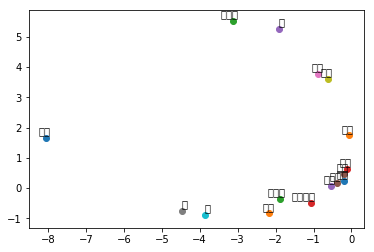

In [8]:
# Word2Vec 모델을 간단하게 구현해봅니다.
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# matplot 에서 한글을 표시하기 위한 설정
#font_name = matplotlib.font_manager.FontProperties(fname="/Library/Fonts/NanumGothic.otf").get_name()
#matplotlib.rc('font', family=font_name)

# 단어 벡터를 분석해볼 임의의 문장들
sentences = ["나 고양이 좋다",
             "나 강아지 좋다",
             "나 동물 좋다",
             "강아지 고양이 동물",
             "여자친구 고양이 강아지 좋다",
             "고양이 생선 우유 좋다",
             "강아지 생선 싫다 우유 좋다",
             "강아지 고양이 눈 좋다",
             "나 여자친구 좋다",
             "여자친구 나 싫다",
             "여자친구 나 영화 책 음악 좋다",
             "나 게임 만화 애니 좋다",
             "고양이 강아지 싫다",
             "강아지 고양이 좋다"]

# 문장을 전부 합친 후 공백으로 단어들을 나누고 고유한 단어들로 리스트를 만듭니다.
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
# 문자열로 분석하는 것 보다, 숫자로 분석하는 것이 훨씬 용이하므로
# 리스트에서 문자들의 인덱스를 뽑아서 사용하기 위해,
# 이를 표현하기 위한 연관 배열과, 단어 리스트에서 단어를 참조 할 수 있는 인덱스 배열을 만듭합니다.
word_dict = {w: i for i, w in enumerate(word_list)}
word_index = [word_dict[word] for word in word_list]

# 윈도우 사이즈를 1 로 하는 skip-gram 모델을 만듭니다.
# 예) 나 게임 만화 애니 좋다
#   -> ([나, 만화], 게임), ([게임, 애니], 만화), ([만화, 좋다], 애니)
#   -> (게임, 나), (게임, 만화), (만화, 게임), (만화, 애니), (애니, 만화), (애니, 좋다)
skip_grams = []

for i in range(1, len(word_index) - 1):
    # (context, target) : ([target index - 1, target index + 1], target)
    target = word_index[i]
    context = [word_index[i - 1], word_index[i + 1]]

    # (target, context[0]), (target, context[1])..
    for w in context:
        skip_grams.append([target, w])


# skip-gram 데이터에서 무작위로 데이터를 뽑아 입력값과 출력값의 배치 데이터를 생성하는 함수
def random_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        random_inputs.append(data[i][0])  # target
        random_labels.append([data[i][1]])  # context word

    return random_inputs, random_labels


#########
# 옵션 설정
######
# 학습을 반복할 횟수
training_epoch = 300
# 학습률
learning_rate = 0.1
# 한 번에 학습할 데이터의 크기
batch_size = 20
# 단어 벡터를 구성할 임베딩 차원의 크기
# 이 예제에서는 x, y 그래프로 표현하기 쉽게 2 개의 값만 출력하도록 합니다.
embedding_size = 2
# word2vec 모델을 학습시키기 위한 nce_loss 함수에서 사용하기 위한 샘플링 크기
# batch_size 보다 작아야 합니다.
num_sampled = 15
# 총 단어 갯수
voc_size = len(word_list)


#########
# 신경망 모델 구성
######
inputs = tf.placeholder(tf.int32, shape=[batch_size])
# tf.nn.nce_loss 를 사용하려면 출력값을 이렇게 [batch_size, 1] 구성해야합니다.
labels = tf.placeholder(tf.int32, shape=[batch_size, 1])

# word2vec 모델의 결과 값인 임베딩 벡터를 저장할 변수입니다.
# 총 단어 갯수와 임베딩 갯수를 크기로 하는 두 개의 차원을 갖습니다.
embeddings = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
# 임베딩 벡터의 차원에서 학습할 입력값에 대한 행들을 뽑아옵니다.
# 예) embeddings     inputs    selected
#    [[1, 2, 3]  -> [2, 3] -> [[2, 3, 4]
#     [2, 3, 4]                [3, 4, 5]]
#     [3, 4, 5]
#     [4, 5, 6]]
selected_embed = tf.nn.embedding_lookup(embeddings, inputs)

# nce_loss 함수에서 사용할 변수들을 정의합니다.
nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([voc_size]))

# nce_loss 함수를 직접 구현하려면 매우 복잡하지만,
# 함수를 텐서플로우가 제공하므로 그냥 tf.nn.nce_loss 함수를 사용하기만 하면 됩니다.
loss = tf.reduce_mean(
            tf.nn.nce_loss(nce_weights, nce_biases, labels, selected_embed, num_sampled, voc_size))

train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)


#########
# 신경망 모델 학습
######
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    for step in range(1, training_epoch + 1):
        batch_inputs, batch_labels = random_batch(skip_grams, batch_size)

        _, loss_val = sess.run([train_op, loss],
                               feed_dict={inputs: batch_inputs,
                                          labels: batch_labels})

        if step % 10 == 0:
            print("loss at step ", step, ": ", loss_val)

    # matplot 으로 출력하여 시각적으로 확인해보기 위해
    # 임베딩 벡터의 결과 값을 계산하여 저장합니다.
    # with 구문 안에서는 sess.run 대신 간단히 eval() 함수를 사용할 수 있습니다.
    trained_embeddings = embeddings.eval()


#########
# 임베딩된 Word2Vec 결과 확인
# 결과는 해당 단어들이 얼마나 다른 단어와 인접해 있는지를 보여줍니다.
######
for i, label in enumerate(word_list):
    x, y = trained_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.show()

In [10]:
# 머신러닝 학습의 Hello World 와 같은 MNIST(손글씨 숫자 인식) 문제를 신경망으로 풀어봅니다.
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
# 텐서플로우에 기본 내장된 mnist 모듈을 이용하여 데이터를 로드합니다.
# 지정한 폴더에 MNIST 데이터가 없는 경우 자동으로 데이터를 다운로드합니다.
# one_hot 옵션은 레이블을 동물 분류 예제에서 보았던 one_hot 방식의 데이터로 만들어줍니다.
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 신경망 모델 구성
######
# 입력 값의 차원은 [배치크기, 특성값] 으로 되어 있습니다.
# 손글씨 이미지는 28x28 픽셀로 이루어져 있고, 이를 784개의 특성값으로 정합니다.
X = tf.placeholder(tf.float32, [None, 784])
# 결과는 0~9 의 10 가지 분류를 가집니다.
Y = tf.placeholder(tf.float32, [None, 10])

# 신경망의 레이어는 다음처럼 구성합니다.
# 784(입력 특성값)
#   -> 256 (히든레이어 뉴런 갯수) -> 256 (히든레이어 뉴런 갯수)
#   -> 10 (결과값 0~9 분류)
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
# 입력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
# L1 레이어의 출력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
# 최종 모델의 출력값은 W3 변수를 곱해 10개의 분류를 가지게 됩니다.
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        # 텐서플로우의 mnist 모델의 next_batch 함수를 이용해
        # 지정한 크기만큼 학습할 데이터를 가져옵니다.
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
######
# model 로 예측한 값과 실제 레이블인 Y의 값을 비교합니다.
# tf.argmax 함수를 이용해 예측한 값에서 가장 큰 값을 예측한 레이블이라고 평가합니다.
# 예) [0.1 0 0 0.7 0 0.2 0 0 0 0] -> 3
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels}))

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.398
Epoch: 0002 Avg. cost = 0.143
Epoch: 0003 Avg. cost = 0.093
Epoch: 0004 Avg. cost = 0.070
Epoch: 0005 Avg. cost = 0.052
Epoch: 0006 Avg. cost = 0.039
Epoch: 0007 Avg. cost = 0.031
Epoch: 0008 Avg. cost = 0.025
Epoch: 0009 Avg. cost = 0.019
Epoch: 0010 Avg. cost = 0.019
Epoch: 0011 Avg. cost = 0.017
Epoch: 0012 Avg. cost = 0.016
Epoch: 0013 Avg. cost = 0.014
Epoch: 0014 Avg. cost = 0.010
Epoch: 0015 Avg. cost = 0.012
최적화 완료!
정확도: 0.9782


Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.420
Epoch: 0002 Avg. cost = 0.162
Epoch: 0003 Avg. cost = 0.116
Epoch: 0004 Avg. cost = 0.088
Epoch: 0005 Avg. cost = 0.073
Epoch: 0006 Avg. cost = 0.062
Epoch: 0007 Avg. cost = 0.052
Epoch: 0008 Avg. cost = 0.046
Epoch: 0009 Avg. cost = 0.041
Epoch: 0010 Avg. cost = 0.037
Epoch: 0011 Avg. cost = 0.034
Epoch: 0012 Avg. cost = 0.031
Epoch: 0013 Avg. cost = 0.029
Epoch: 0014 Avg. cost = 0.028
Epoch: 0015 Avg. cost = 0.027
Epoch: 0016 Avg. cost = 0.024
Epoch: 0017 Avg. cost = 0.024
Epoch: 0018 Avg. cost = 0.021
Epoch: 0019 Avg. cost = 0.023
Epoch: 0020 Avg. cost = 0.021
Epoch: 0021 Avg. cost = 0.019
Epoch: 0022 Avg. cost = 0.018
Epoch: 0023 Avg. cost = 0.020
Epoch: 0024 Avg. cost = 0.019
Epoch: 0025 Avg. cost = 0.020
Epoch: 0026 Avg. cost = 0.016
Epoch: 0027 Avg. c

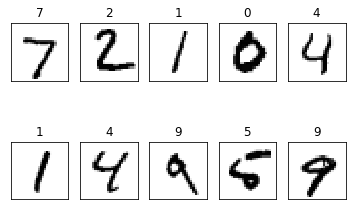

In [11]:
# 과적합 방지 기법 중 하나인 Dropout 을 사용해봅니다.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
# 텐서플로우에 내장된 함수를 이용하여 dropout 을 적용합니다.
# 함수에 적용할 레이어와 확률만 넣어주면 됩니다. 겁나 매직!!
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.8})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels,
                                   keep_prob: 1}))

#########
# 결과 확인 (matplot)
######
labels = sess.run(model,
                  feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels,
                             keep_prob: 1})

fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                   cmap=plt.cm.gray_r)

plt.show()

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.1990
Epoch: 0002 Avg. cost = 0.0570
Epoch: 0003 Avg. cost = 0.0466
Epoch: 0004 Avg. cost = 0.0402
Epoch: 0005 Avg. cost = 0.0366
Epoch: 0006 Avg. cost = 0.0337
Epoch: 0007 Avg. cost = 0.0313
Epoch: 0008 Avg. cost = 0.0299
Epoch: 0009 Avg. cost = 0.0283
Epoch: 0010 Avg. cost = 0.0270
Epoch: 0011 Avg. cost = 0.0265
Epoch: 0012 Avg. cost = 0.0262
Epoch: 0013 Avg. cost = 0.0260
Epoch: 0014 Avg. cost = 0.0258
Epoch: 0015 Avg. cost = 0.0255
Epoch: 0016 Avg. cost = 0.0251
Epoch: 0017 Avg. cost = 0.0248
Epoch: 0018 Avg. cost = 0.0246
Epoch: 0019 Avg. cost = 0.0245
Epoch: 0020 Avg. cost = 0.0243
최적화 완료!


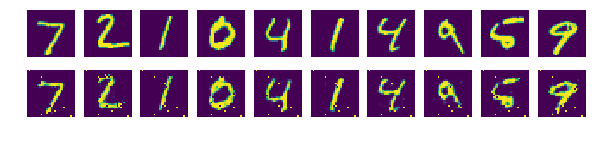

In [12]:
# 대표적인 비지도(Unsupervised) 학습 방법인 Autoencoder 를 구현해봅니다.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 옵션 설정
######
learning_rate = 0.01
training_epoch = 20
batch_size = 100
# 신경망 레이어 구성 옵션
n_hidden = 256  # 히든 레이어의 뉴런 갯수
n_input = 28*28   # 입력값 크기 - 이미지 픽셀수

#########
# 신경망 모델 구성
######
# Y 가 없습니다. 입력값을 Y로 사용하기 때문입니다.
X = tf.placeholder(tf.float32, [None, n_input])

# 인코더 레이어와 디코더 레이어의 가중치와 편향 변수를 설정합니다.
# 다음과 같이 이어지는 레이어를 구성하기 위한 값들 입니다.
# input -> encode -> decode -> output
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
# sigmoid 함수를 이용해 신경망 레이어를 구성합니다.
# sigmoid(X * W + b)
# 인코더 레이어 구성
encoder = tf.nn.sigmoid(
                tf.add(tf.matmul(X, W_encode), b_encode))

# encode 의 아웃풋 크기를 입력값보다 작은 크기로 만들어 정보를 압축하여 특성을 뽑아내고,
# decode 의 출력을 입력값과 동일한 크기를 갖도록하여 입력과 똑같은 아웃풋을 만들어 내도록 합니다.
# 히든 레이어의 구성과 특성치을 뽑아내는 알고리즘을 변경하여 다양한 오토인코더를 만들 수 있습니다.
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
# 디코더 레이어 구성
# 이 디코더가 최종 모델이 됩니다.
decoder = tf.nn.sigmoid(
                tf.add(tf.matmul(encoder, W_decode), b_decode))

# 디코더는 인풋과 최대한 같은 결과를 내야 하므로, 디코딩한 결과를 평가하기 위해
# 입력 값인 X 값을 평가를 위한 실측 결과 값으로하여 decoder 와의 차이를 손실값으로 설정합니다.
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
# 입력값(위쪽)과 모델이 생성한 값(아래쪽)을 시각적으로 비교해봅니다.
######
sample_size = 10

samples = sess.run(decoder,
                   feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import boston_housing
 
(X_train, Y_train), (X_test, Y_test) = boston_housing.load_data()
 
nFeatures = X_train.shape[1]
 
model = Sequential()
model.add(Dense(1, input_shape=(nFeatures,), activation='linear'))
 
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse', 'mae'])
 
model.fit(X_train, Y_train, batch_size=4, epochs=1000)
 
model.summary()

57344/57026 [==============================] - 0s     
Epoch 1/1000
404/404 [==============================] - 0s - loss: 9955.2548 - mean_squared_error: 9955.2548 - mean_absolute_error: 93.0607       
Epoch 2/1000
404/404 [==============================] - 0s - loss: 1942.5695 - mean_squared_error: 1942.5695 - mean_absolute_error: 37.5356     
Epoch 3/1000
404/404 [==============================] - 0s - loss: 836.2504 - mean_squared_error: 836.2504 - mean_absolute_error: 23.5171      
Epoch 4/1000
404/404 [==============================] - 0s - loss: 443.5026 - mean_squared_error: 443.5026 - mean_absolute_error: 17.1821     
Epoch 5/1000
404/404 [==============================] - 0s - loss: 263.5581 - mean_squared_error: 263.5581 - mean_absolute_error: 13.0285     
Epoch 6/1000
404/404 [==============================] - 0s - loss: 184.4565 - mean_squared_error: 184.4565 - mean_absolute_error: 10.5098     
Epoch 7/1000
404/404 [==============================] - 0s - loss: 155.6056 - me

404/404 [==============================] - 0s - loss: 38.9452 - mean_squared_error: 38.9452 - mean_absolute_error: 4.6375     
Epoch 115/1000
404/404 [==============================] - 0s - loss: 38.2885 - mean_squared_error: 38.2885 - mean_absolute_error: 4.7004     
Epoch 116/1000
404/404 [==============================] - ETA: 0s - loss: 36.1051 - mean_squared_error: 36.1051 - mean_absolute_error: 4.57 - 0s - loss: 38.4618 - mean_squared_error: 38.4618 - mean_absolute_error: 4.6738     
Epoch 117/1000
404/404 [==============================] - 0s - loss: 38.4893 - mean_squared_error: 38.4893 - mean_absolute_error: 4.6162     
Epoch 118/1000
404/404 [==============================] - 0s - loss: 38.4549 - mean_squared_error: 38.4549 - mean_absolute_error: 4.6446     
Epoch 119/1000
404/404 [==============================] - 0s - loss: 37.6799 - mean_squared_error: 37.6799 - mean_absolute_error: 4.6660     
Epoch 120/1000
404/404 [==============================] - 0s - loss: 38.0475 - 

404/404 [==============================] - 0s - loss: 32.4914 - mean_squared_error: 32.4914 - mean_absolute_error: 4.2601     
Epoch 229/1000
404/404 [==============================] - 0s - loss: 32.6032 - mean_squared_error: 32.6032 - mean_absolute_error: 4.2378     
Epoch 230/1000
404/404 [==============================] - 0s - loss: 32.6236 - mean_squared_error: 32.6236 - mean_absolute_error: 4.2592     
Epoch 231/1000
404/404 [==============================] - 0s - loss: 32.1794 - mean_squared_error: 32.1794 - mean_absolute_error: 4.2025     
Epoch 232/1000
404/404 [==============================] - 0s - loss: 31.8593 - mean_squared_error: 31.8593 - mean_absolute_error: 4.2762     
Epoch 233/1000
404/404 [==============================] - 0s - loss: 32.6347 - mean_squared_error: 32.6347 - mean_absolute_error: 4.2380     
Epoch 234/1000
404/404 [==============================] - 0s - loss: 32.8011 - mean_squared_error: 32.8011 - mean_absolute_error: 4.2302     
Epoch 235/1000
404/40

404/404 [==============================] - 0s - loss: 29.1837 - mean_squared_error: 29.1837 - mean_absolute_error: 3.9092     
Epoch 343/1000
404/404 [==============================] - 0s - loss: 29.2727 - mean_squared_error: 29.2727 - mean_absolute_error: 3.9811     
Epoch 344/1000
404/404 [==============================] - 0s - loss: 29.2397 - mean_squared_error: 29.2397 - mean_absolute_error: 3.9175     
Epoch 345/1000
404/404 [==============================] - 0s - loss: 29.2069 - mean_squared_error: 29.2069 - mean_absolute_error: 3.9318     
Epoch 346/1000
404/404 [==============================] - 0s - loss: 29.6868 - mean_squared_error: 29.6868 - mean_absolute_error: 3.9139     
Epoch 347/1000
404/404 [==============================] - 0s - loss: 28.5760 - mean_squared_error: 28.5760 - mean_absolute_error: 3.9212     
Epoch 348/1000
404/404 [==============================] - 0s - loss: 28.4621 - mean_squared_error: 28.4621 - mean_absolute_error: 3.7672     
Epoch 349/1000
404/40

404/404 [==============================] - 0s - loss: 27.7543 - mean_squared_error: 27.7543 - mean_absolute_error: 3.7488     
Epoch 456/1000
404/404 [==============================] - 0s - loss: 27.5556 - mean_squared_error: 27.5556 - mean_absolute_error: 3.7612     
Epoch 457/1000
404/404 [==============================] - 0s - loss: 27.8852 - mean_squared_error: 27.8852 - mean_absolute_error: 3.8137     
Epoch 458/1000
404/404 [==============================] - 0s - loss: 27.9354 - mean_squared_error: 27.9354 - mean_absolute_error: 3.7597     
Epoch 459/1000
404/404 [==============================] - 0s - loss: 28.0731 - mean_squared_error: 28.0731 - mean_absolute_error: 3.7441     
Epoch 460/1000
404/404 [==============================] - 0s - loss: 27.4280 - mean_squared_error: 27.4280 - mean_absolute_error: 3.6668     
Epoch 461/1000
404/404 [==============================] - 0s - loss: 28.2922 - mean_squared_error: 28.2922 - mean_absolute_error: 3.7664     
Epoch 462/1000
404/40

404/404 [==============================] - 0s - loss: 27.1144 - mean_squared_error: 27.1144 - mean_absolute_error: 3.6705     
Epoch 569/1000
404/404 [==============================] - 0s - loss: 26.7555 - mean_squared_error: 26.7555 - mean_absolute_error: 3.6779     
Epoch 570/1000
404/404 [==============================] - 0s - loss: 27.2177 - mean_squared_error: 27.2177 - mean_absolute_error: 3.6610     
Epoch 571/1000
404/404 [==============================] - 0s - loss: 26.5363 - mean_squared_error: 26.5363 - mean_absolute_error: 3.6483     
Epoch 572/1000
404/404 [==============================] - 0s - loss: 26.0902 - mean_squared_error: 26.0902 - mean_absolute_error: 3.6782     
Epoch 573/1000
404/404 [==============================] - 0s - loss: 27.1459 - mean_squared_error: 27.1459 - mean_absolute_error: 3.6831     
Epoch 574/1000
404/404 [==============================] - 0s - loss: 26.8534 - mean_squared_error: 26.8534 - mean_absolute_error: 3.5999     
Epoch 575/1000
404/40

404/404 [==============================] - 0s - loss: 26.7767 - mean_squared_error: 26.7767 - mean_absolute_error: 3.5359     
Epoch 682/1000
404/404 [==============================] - 0s - loss: 26.6657 - mean_squared_error: 26.6657 - mean_absolute_error: 3.5828     
Epoch 683/1000
404/404 [==============================] - 0s - loss: 26.8692 - mean_squared_error: 26.8692 - mean_absolute_error: 3.5912     
Epoch 684/1000
404/404 [==============================] - 0s - loss: 26.2664 - mean_squared_error: 26.2664 - mean_absolute_error: 3.5753     
Epoch 685/1000
404/404 [==============================] - 0s - loss: 26.6071 - mean_squared_error: 26.6071 - mean_absolute_error: 3.6569     
Epoch 686/1000
404/404 [==============================] - 0s - loss: 26.5639 - mean_squared_error: 26.5639 - mean_absolute_error: 3.6237     
Epoch 687/1000
404/404 [==============================] - 0s - loss: 26.9950 - mean_squared_error: 26.9950 - mean_absolute_error: 3.5737     
Epoch 688/1000
404/40

404/404 [==============================] - 0s - loss: 25.9813 - mean_squared_error: 25.9813 - mean_absolute_error: 3.5798     
Epoch 795/1000
404/404 [==============================] - 0s - loss: 26.2040 - mean_squared_error: 26.2040 - mean_absolute_error: 3.5363     
Epoch 796/1000
404/404 [==============================] - 0s - loss: 25.9717 - mean_squared_error: 25.9717 - mean_absolute_error: 3.5821     
Epoch 797/1000
404/404 [==============================] - 0s - loss: 26.1182 - mean_squared_error: 26.1182 - mean_absolute_error: 3.4856     
Epoch 798/1000
404/404 [==============================] - 0s - loss: 26.4893 - mean_squared_error: 26.4893 - mean_absolute_error: 3.5700     
Epoch 799/1000
404/404 [==============================] - 0s - loss: 26.4409 - mean_squared_error: 26.4409 - mean_absolute_error: 3.5372     
Epoch 800/1000
404/404 [==============================] - 0s - loss: 26.6846 - mean_squared_error: 26.6846 - mean_absolute_error: 3.5939     
Epoch 801/1000
404/40

404/404 [==============================] - 0s - loss: 25.5118 - mean_squared_error: 25.5118 - mean_absolute_error: 3.5320     
Epoch 908/1000
404/404 [==============================] - 0s - loss: 26.3846 - mean_squared_error: 26.3846 - mean_absolute_error: 3.5265     
Epoch 909/1000
404/404 [==============================] - 0s - loss: 26.4536 - mean_squared_error: 26.4536 - mean_absolute_error: 3.5145     
Epoch 910/1000
404/404 [==============================] - 0s - loss: 25.8730 - mean_squared_error: 25.8730 - mean_absolute_error: 3.5395     
Epoch 911/1000
404/404 [==============================] - 0s - loss: 26.6076 - mean_squared_error: 26.6076 - mean_absolute_error: 3.5254     
Epoch 912/1000
404/404 [==============================] - 0s - loss: 25.9868 - mean_squared_error: 25.9868 - mean_absolute_error: 3.5006     
Epoch 913/1000
404/404 [==============================] - 0s - loss: 26.2131 - mean_squared_error: 26.2131 - mean_absolute_error: 3.5675     
Epoch 914/1000
404/40